C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 19s - 64ms/step - loss: 0.0411 - mean_absolute_error: 0.0936 - mean_squared_error: 0.0411 - val_loss: 0.0193 - val_mean_absolute_error: 0.0536 - val_mean_squared_error: 0.0193
Epoch 2/10
300/300 - 7s - 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0474 - mean_squared_error: 0.0162 - val_loss: 0.0134 - val_mean_absolute_error: 0.0419 - val_mean_squared_error: 0.0134
Epoch 3/10
300/300 - 7s - 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0398 - mean_squared_error: 0.0126 - val_loss: 0.0117 - val_mean_absolute_error: 0.0371 - val_mean_squared_error: 0.0117
Epoch 4/10
300/300 - 7s - 24ms/step - loss: 0.0109 - mean_absolute_error: 0.0361 - mean_squared_error: 0.0109 - val_loss: 0.0100 - val_mean_absolute_error: 0.0345 - val_mean_squared_error: 0.0100
Epoch 5/10
300/300 - 8s - 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0336 - mean_squared_error: 0.0097 - val_loss: 0.0092 - val_mean_absolute_error: 0.0325 - val_mean_squared_error: 0.0092
Epoch 6/10
300/300 

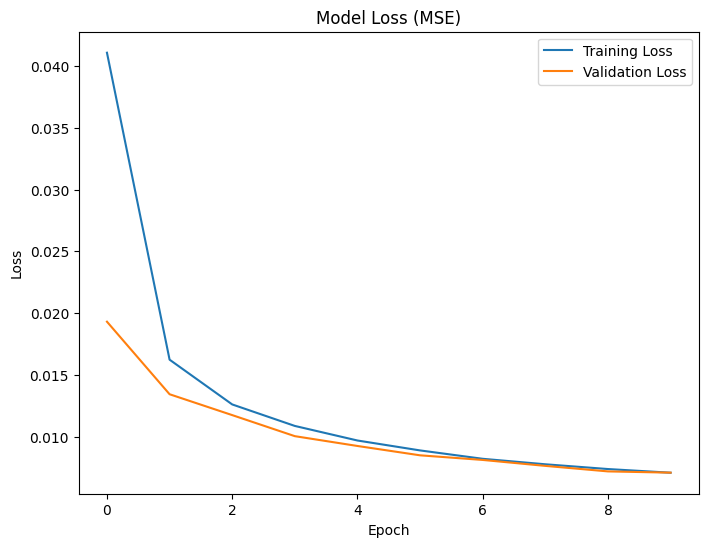

Test Images


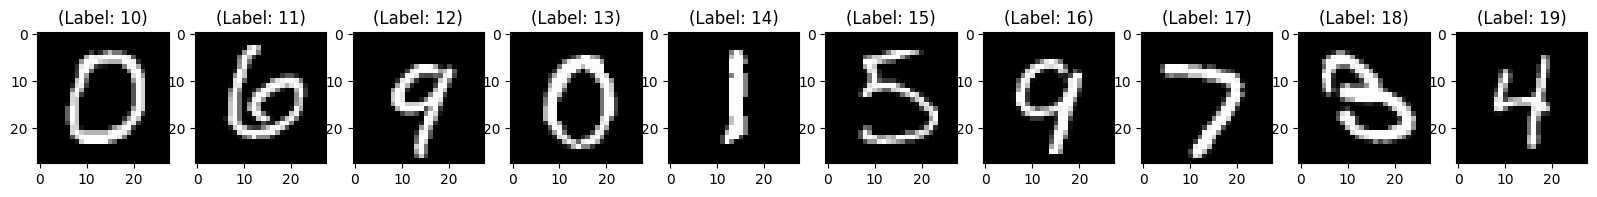

Test Images with Noise


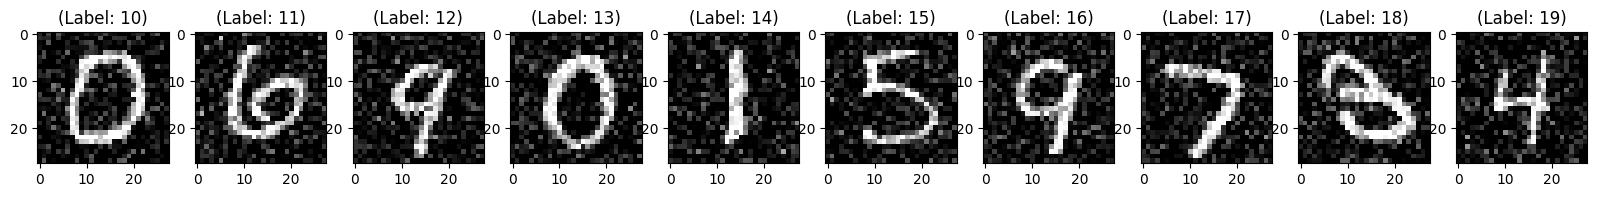

Reconstruction of Noisy Test Images


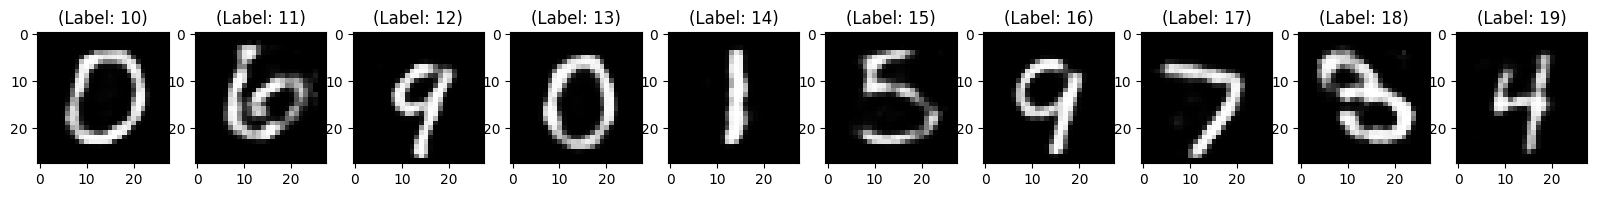

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras import metrics

# Load and preprocess data
(X_train, _), (X_test, _) = mnist.load_data()
X_train, X_test = X_train.reshape(-1, 784) / 255.0, X_test.reshape(-1, 784) / 255.0
noise_factor = 0.2
x_train_noisy = np.clip(X_train + noise_factor * np.random.normal(0, 1, X_train.shape), 0, 1)
x_test_noisy = np.clip(X_test + noise_factor * np.random.normal(0, 1, X_test.shape), 0, 1)

# Build and train model
model = Sequential([Dense(500, input_dim=784, activation='relu'),
                    Dense(300, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(300, activation='relu'),
                    Dense(500, activation='relu'),
                    Dense(784, activation='sigmoid')])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])
history = model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=10, batch_size=200, verbose=2)

# Predict and reshape for visualization
pred = model.predict(x_test_noisy).reshape(-1, 28, 28) * 255
X_test = X_test.reshape(-1, 28, 28) * 255
x_test_noisy = x_test_noisy.reshape(-1, 28, 28) * 255

# Plot functions for loss, MAE, and images
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss (MSE)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_images(images, title, start_idx=10, end_idx=20):
    plt.figure(figsize=(20, 4))
    print(title)
    for i in range(start_idx, end_idx):
        plt.subplot(2, 10, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"(Label: {i})")
    plt.show()

# Plot loss, MAE, and images
plot_loss(history)
plot_images(X_test, "Test Images")
plot_images(x_test_noisy, "Test Images with Noise")
plot_images(pred, "Reconstruction of Noisy Test Images")


In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, mean_absolute_percentage_error, explained_variance_score
import numpy as np
import pandas as pd

# Predictions and actual values (flattened for metric calculations)
y_true = X_test.reshape(X_test.shape[0], -1) / 255.0  # Scale back to [0, 1] range
y_pred = pred.reshape(pred.shape[0], -1) / 255.0      # Scale back to [0, 1] range

# Compute metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
medae = median_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
evs = explained_variance_score(y_true, y_pred)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error',
               'R-squared', 'Median Absolute Error', 'Mean Absolute Percentage Error',
               'Explained Variance Score'],
    'Value': [mse, mae, rmse, r2, medae, mape, evs]
})

# Optionally, for a better display format (in Jupyter environments)
from IPython.display import display
display(metrics_df.style.set_caption("Model Performance Metrics").set_table_styles(
    [{'selector': 'caption', 'props': [('font-size', '16px'), ('text-align', 'center')]}]
))

,Metric,Value
0,Mean Squared Error,0.007072
1,Mean Absolute Error,0.027625
2,Root Mean Squared Error,0.084097
3,R-squared,0.490515
4,Median Absolute Error,0.005624
5,Mean Absolute Percentage Error,21535574203735.921875
6,Explained Variance Score,0.502312
